Dependencies

In [1]:
import tensorflow as tf 
import os

Removing dodgy images

In [2]:
import cv2
import imghdr

C:\Users\Bruce\AppData\Local\Temp\ipykernel_11684\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'data2'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [12]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data2')

In [13]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data2')

Found 503 files belonging to 2 classes.


Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt


In [15]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 503 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

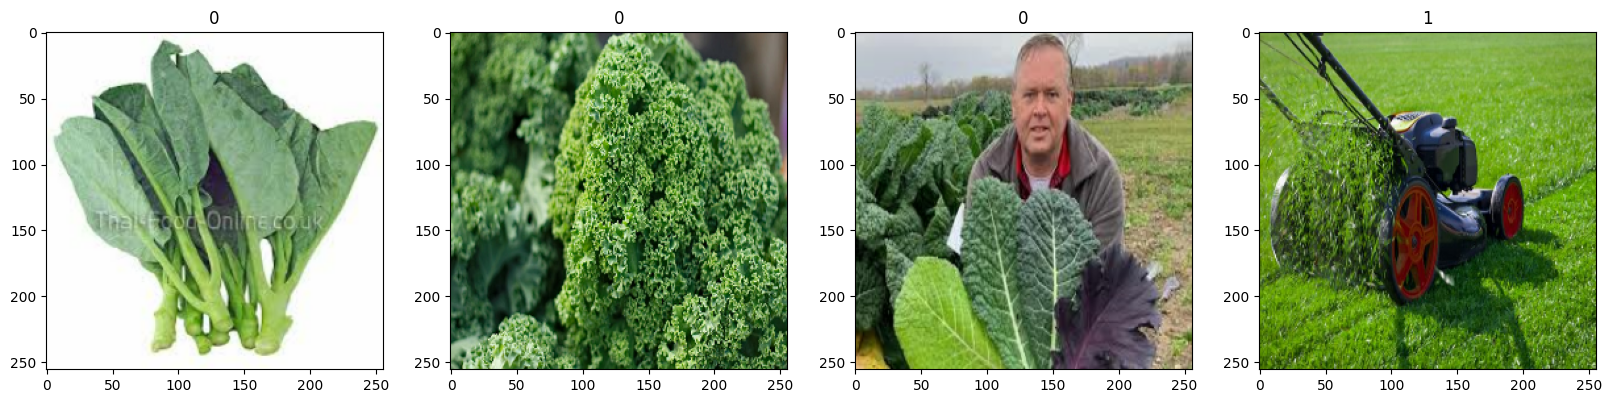

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[8.21652889e-01, 8.21652889e-01, 8.21652889e-01],
          [9.71668184e-01, 9.72541332e-01, 9.72104788e-01],
          [9.40609694e-01, 9.49908078e-01, 9.45986509e-01],
          ...,
          [4.32544410e-01, 4.27167594e-01, 3.57306987e-01],
          [3.26386333e-01, 3.32919717e-01, 2.51876533e-01],
          [3.66590083e-01, 3.74433219e-01, 2.92080283e-01]],
 
         [[8.15003633e-01, 8.15170169e-01, 8.15086961e-01],
          [9.67929363e-01, 9.72791195e-01, 9.70360279e-01],
          [9.42437470e-01, 9.51735854e-01, 9.47814286e-01],
          ...,
          [4.02581125e-01, 4.02687639e-01, 3.26510876e-01],
          [3.24628711e-01, 3.33905935e-01, 2.56101906e-01],
          [3.86204749e-01, 3.91970217e-01, 3.16266567e-01]],
 
         [[8.02402973e-01, 8.03736389e-01, 8.05884421e-01],
          [9.64384913e-01, 9.71102118e-01, 9.70558345e-01],
          [9.45428729e-01, 9.53810155e-01, 9.53057408e-01],
          ...,
          [3.98004323e-01, 4.02627140e-01, 3.1984

Split Data

In [30]:
len(data)

16

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [35]:
train_size+val_size+test_size

16

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning Model

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Bruce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 859ms/step - accuracy: 0.5442 - loss: 1.1429 - val_accuracy: 0.6250 - val_loss: 0.6373
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 852ms/step - accuracy: 0.6536 - loss: 0.6248 - val_accuracy: 0.7292 - val_loss: 0.5418
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 907ms/step - accuracy: 0.7362 - loss: 0.5192 - val_accuracy: 0.7500 - val_loss: 0.4784
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 803ms/step - accuracy: 0.7754 - loss: 0.5278 - val_accuracy: 0.7292 - val_loss: 0.5346
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 820ms/step - accuracy: 0.8134 - loss: 0.4503 - val_accuracy: 0.7917 - val_loss: 0.4766
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 829ms/step - accuracy: 0.8149 - loss: 0.3996 - val_accuracy: 0.8646 - val_loss: 0.3290
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 869ms/step - accuracy: 0.8156 - loss: 0.3998 - val_accuracy: 0.7188 - val_loss: 0.5628
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 825ms/step - accuracy: 0.7703 - loss: 0.4871 - val_accuracy

Plot Perfomance

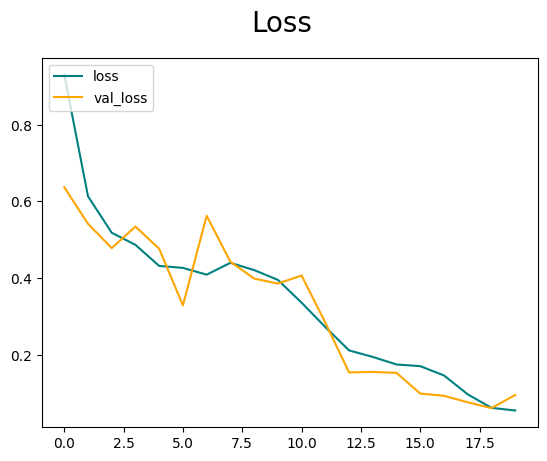

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

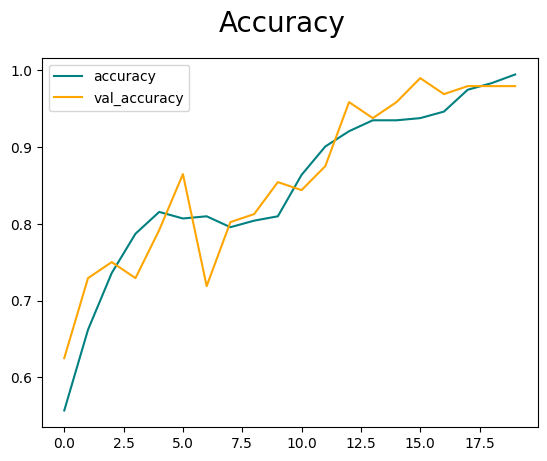

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evluation

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [57]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


Test

In [58]:
import cv2
import matplotlib.pyplot as plt
import os

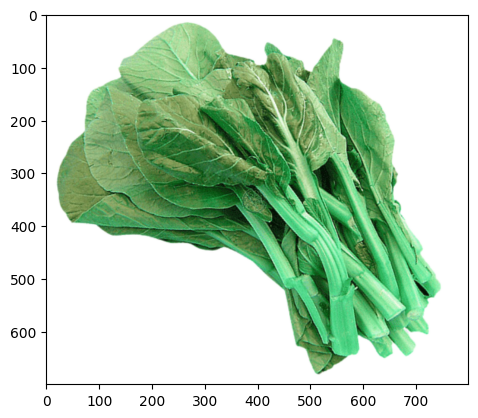

In [96]:
img = cv2.imread('kale2.png')
plt.imshow(img)
plt.show()

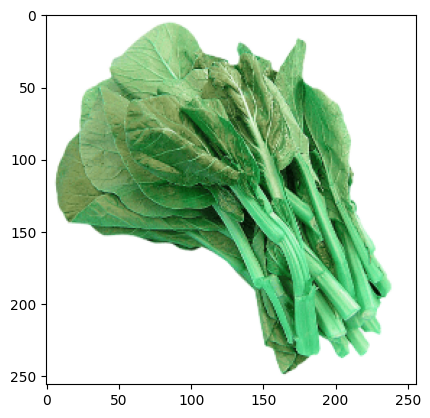

In [97]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [99]:
yhat

array([[1.1714881e-05]], dtype=float32)

In [101]:
if yhat > 0.5:
    print(f'Predicted class is weed')
else:
    print(f'Predicted class is Kale')

Predicted class is Kale


Saving Model

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join('models', 'kales-weedClassifier.h5'))

In [104]:
new_model = load_model(os.path.join('models', 'kales-weedClassifier.h5'))

In [105]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


array([[1.1714881e-05]], dtype=float32)